# 1. import libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, 
classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
df.shape

(303, 14)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object') 
df['restecg'] = df['restecg'].astype('object') 
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object') 
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [8]:
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"}) 
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina",1: "atypical_angina", 
                          2:"non-anginal pain", 3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"}) 
df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",
                                2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect",
                              3:"normal"})



C:\Users\mange\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


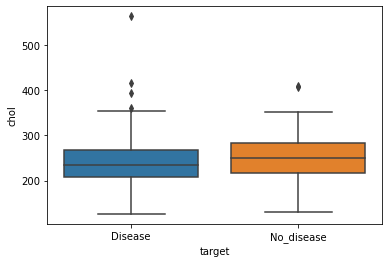

In [9]:
bxplt = sns.boxplot(df["target"],df["chol"]) 
plt.show()

In [10]:
df.describe()

age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

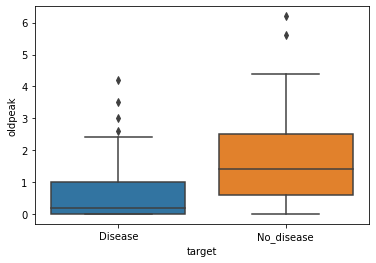

In [11]:
sns.boxplot(x='target', y='oldpeak', data=df)

In [12]:
# define continuous variable & plot

continous_features = ['age','trestbps','chol','thalach','oldpeak'] 
def outliers(df_out, drop = False):
    for each_feature in df_out.columns: 
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data 
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data 
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 
 
        outliers=feature_data[~((feature_data >= Q1 - outlier_step)
                        &(feature_data<=Q3+outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is{}'.format(each_feature,
                                                                   len(outliers))) 
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore') 
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])


For the feature age, No of Outliers is0
For the feature trestbps, No of Outliers is9
For the feature chol, No of Outliers is5
For the feature thalach, No of Outliers is1
For the feature oldpeak, No of Outliers is5


In [13]:
# Drop Outliers
outliers(df[continous_features],drop=True) 

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [14]:
# Checking for the duplicate rows 
duplicated=df.duplicated().sum()
if duplicated:
    print("Duplicated rows :{}".format(duplicated)) 
else:
    print("No duplicates")


Duplicated rows :1


In [15]:
# Displaying duplicate rows 
duplicates=df[df.duplicated(keep=False)] 
duplicates.head()

age   sex                cp  trestbps  chol    fbs restecg  thalach  \
163   38  Male  non-anginal pain       138   175  False       1      173   
164   38  Male  non-anginal pain       138   175  False       1      173   

    exang  oldpeak        slope ca               thal   target  
163    No      0.0  downsloping  4  reversable_defect  Disease  
164    No      0.0  downsloping  4  reversable_defect  Disease

In [16]:
# will remove duplicates
df.drop_duplicates()

age     sex                cp  trestbps  chol    fbs restecg  thalach  \
0     63    Male       asymtomatic       145   233   True       0      150   
1     37    Male  non-anginal pain       130   250  False       1      187   
2     41  Female   atypical_angina       130   204  False       0      172   
3     56    Male   atypical_angina       120   236  False       1      178   
4     57  Female    typical_angina       120   354  False       1      163   
..   ...     ...               ...       ...   ...    ...     ...      ...   
298   57  Female    typical_angina       140   241  False       1      123   
299   45    Male       asymtomatic       110   264  False       1      132   
300   68    Male    typical_angina       144   193   True       1      141   
301   57    Male    typical_angina       130   131  False       1      115   
302   57  Female   atypical_angina       130   236  False       0      174   

    exang  oldpeak        slope ca               thal      target  
0      No      2.3    upsloping  0       fixed_defect     Disease  
1      No      3.5    upsloping  0  reversable_defect     Disease  
2      No      1.4  downsloping  0  reversable_defect     Disease  
3      No      0.8  downsloping  0  reversable_defect     Disease  
4     Yes      0.6  downsloping  0  reversable_defect     Disease  
..    ...      ...          ... ..                ...         ...  
298   Yes      0.2         flat  0             normal  No_disease  
299    No      1.2         flat  0             normal  No_disease  
300    No      3.4         flat  2             normal  No_disease  
301   Yes      1.2         flat  1             normal  No_disease  
302    No      0.0         flat  1  reversable_defect  No_disease  

[283 rows x 14 columns]

In [17]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [18]:
df['thal'].unique()

array(['fixed_defect', 'reversable_defect', 'normal', 0], dtype=object)

In [19]:
df['thal'].replace({"fixed_defect":1, "reversable_defect":2, "normal":3},
                   inplace= True)

In [20]:
df[df['ca']==4]

age   sex                cp  trestbps  chol    fbs restecg  thalach  \
92    52  Male  non-anginal pain       138   223  False       1      169   
158   58  Male   atypical_angina       125   220  False       1      144   
163   38  Male  non-anginal pain       138   175  False       1      173   
164   38  Male  non-anginal pain       138   175  False       1      173   
251   43  Male    typical_angina       132   247   True       0      143   

    exang  oldpeak        slope ca  thal      target  
92     No      0.0  downsloping  4     2     Disease  
158    No      0.4         flat  4     3     Disease  
163    No      0.0  downsloping  4     2     Disease  
164    No      0.0  downsloping  4     2     Disease  
251   Yes      0.1         flat  4     3  No_disease

In [21]:
df.loc[df['ca']==4,'ca']=np.NaN
df.loc[df['thal']==0,'thal']=np.NaN

In [22]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [23]:
df = df.fillna(df.median()) 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    object 
 2   cp        284 non-null    object 
 3   trestbps  284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    object 
 6   restecg   284 non-null    int64  
 7   thalach   284 non-null    int64  
 8   exang     284 non-null    object 
 9   oldpeak   284 non-null    float64
 10  slope     284 non-null    object 
 11  ca        284 non-null    float64
 12  thal      284 non-null    float64
 13  target    284 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 33.3+ KB


In [25]:
df['target'] = df.target.replace({"Disease":1,"No_disease":0}) 
df['sex'] = df.sex.replace({"Male":1,"Female":0})
df['cp'] = df.cp.replace({"typical_angina":0,"atypical_angina":1,
                          "non-anginal pain":2, "asymtomatic":3})

df['exang'] = df.exang.replace({"Yes":1,"No":0})
df['fbs'] = df.fbs.replace({"True":1,"False":0}) 
df['slope'] = df.slope.replace({"upsloping":0,"flat":1,"downsloping":2})
df['thal'] = df.thal.replace({"fixed_defect":1, "reversable_defect":2, 
                              "normal":3})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trestbps  284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    int64  
 6   restecg   284 non-null    int64  
 7   thalach   284 non-null    int64  
 8   exang     284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slope     284 non-null    int64  
 11  ca        284 non-null    float64
 12  thal      284 non-null    float64
 13  target    284 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [27]:
df['target'].value_counts()

1    159
0    125
Name: target, dtype: int64

In [28]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

    ca  thal  target  
0  0.0   1.0       1  
1  0.0   2.0       1  
2  0.0   2.0       1  
3  0.0   2.0       1  
4  0.0   2.0       1

In [29]:
# splitting data

In [30]:
x = df.drop('target',axis = 1)
y = df['target']

In [31]:
# normalization

In [32]:
normal_scaler = MinMaxScaler(feature_range = (0,1))
x_scaled = normal_scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled_df

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.671053  0.457265  1.0      0.0  0.543860   
1    0.166667  1.0  0.666667  0.473684  0.529915  0.0      0.5  0.868421   
2    0.250000  0.0  0.333333  0.473684  0.333333  0.0      0.0  0.736842   
3    0.562500  1.0  0.333333  0.342105  0.470085  0.0      0.5  0.789474   
4    0.583333  0.0  0.000000  0.342105  0.974359  0.0      0.5  0.657895   
..        ...  ...       ...       ...       ...  ...      ...       ...   
279  0.583333  0.0  0.000000  0.605263  0.491453  0.0      0.5  0.307018   
280  0.333333  1.0  1.000000  0.210526  0.589744  0.0      0.5  0.385965   
281  0.812500  1.0  0.000000  0.657895  0.286325  1.0      0.5  0.464912   
282  0.583333  1.0  0.000000  0.473684  0.021368  0.0      0.5  0.236842   
283  0.583333  0.0  0.333333  0.473684  0.470085  0.0      0.0  0.754386   

     exang  oldpeak  slope        ca  thal  
0      0.0    0.575    0.0  0.000000   0.0  
1      0.0    0.875    0.0  0.000000   0.5  
2      0.0    0.350    1.0  0.000000   0.5  
3      0.0    0.200    1.0  0.000000   0.5  
4      1.0    0.150    1.0  0.000000   0.5  
..     ...      ...    ...       ...   ...  
279    1.0    0.050    0.5  0.000000   1.0  
280    0.0    0.300    0.5  0.000000   1.0  
281    0.0    0.850    0.5  0.666667   1.0  
282    1.0    0.300    0.5  0.333333   1.0  
283    0.0    0.000    0.5  0.333333   0.5  

[284 rows x 13 columns]

In [33]:
# standardization

In [34]:
# standard_scaler = StandardScaler()
# x_scaled = standard_scaler.fit_transform(x)
# x_scaled_std_df = pd.DataFrame(x_scaled,columns = x.columns)
# x_scaled_std_df

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df,y,
                    test_size = 0.2,random_state = 1,stratify = y)

In [36]:
log_reg = LogisticRegression()

In [37]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [38]:
# prediction
y_pred = log_reg.predict(x_test)

In [39]:
y_pred[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [40]:
y_test[0:5]

155    1
243    0
23     1
193    0
181    0
Name: target, dtype: int64

In [41]:
accuracy_score(y_test,y_pred)

0.8421052631578947

In [42]:
confusion_matrix(y_test,y_pred)

array([[18,  7],
       [ 2, 30]], dtype=int64)

In [43]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.81      0.94      0.87        32

    accuracy                           0.84        57
   macro avg       0.86      0.83      0.83        57
weighted avg       0.85      0.84      0.84        57

